In [4]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.deterministic import DeterministicProcess
import seaborn as sns
import plotly.express as px
df=pd.read_csv('data/Housing.csv')

Attribute Information:

1) CRIM : per capita crime rate by town.
2) ZN : proportion of residential land zoned for lots over 25,000 sq.ft.
3) INDUS: proportion of non-retail business acres per town.
4) CHAS : Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
5) NOX : nitric oxides concentration (parts per 10 million).
6) RM : average number of rooms per dwelling.
7) AGE : proportion of owner-occupied units built prior to 1940.
8) DIS : weighted distances to five Boston employment centres.
9) RAD : index of accessibility to radial highways.
10) TAX : full-value property-tax rate per $10,000.
11) PTRATIO : pupil-teacher ratio by town.
12) B : 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town. *measure racial segregation*
13) LSTAT: % lower status of the population.
14) MEDV : Median value of owner-occupied homes in $1000's.*

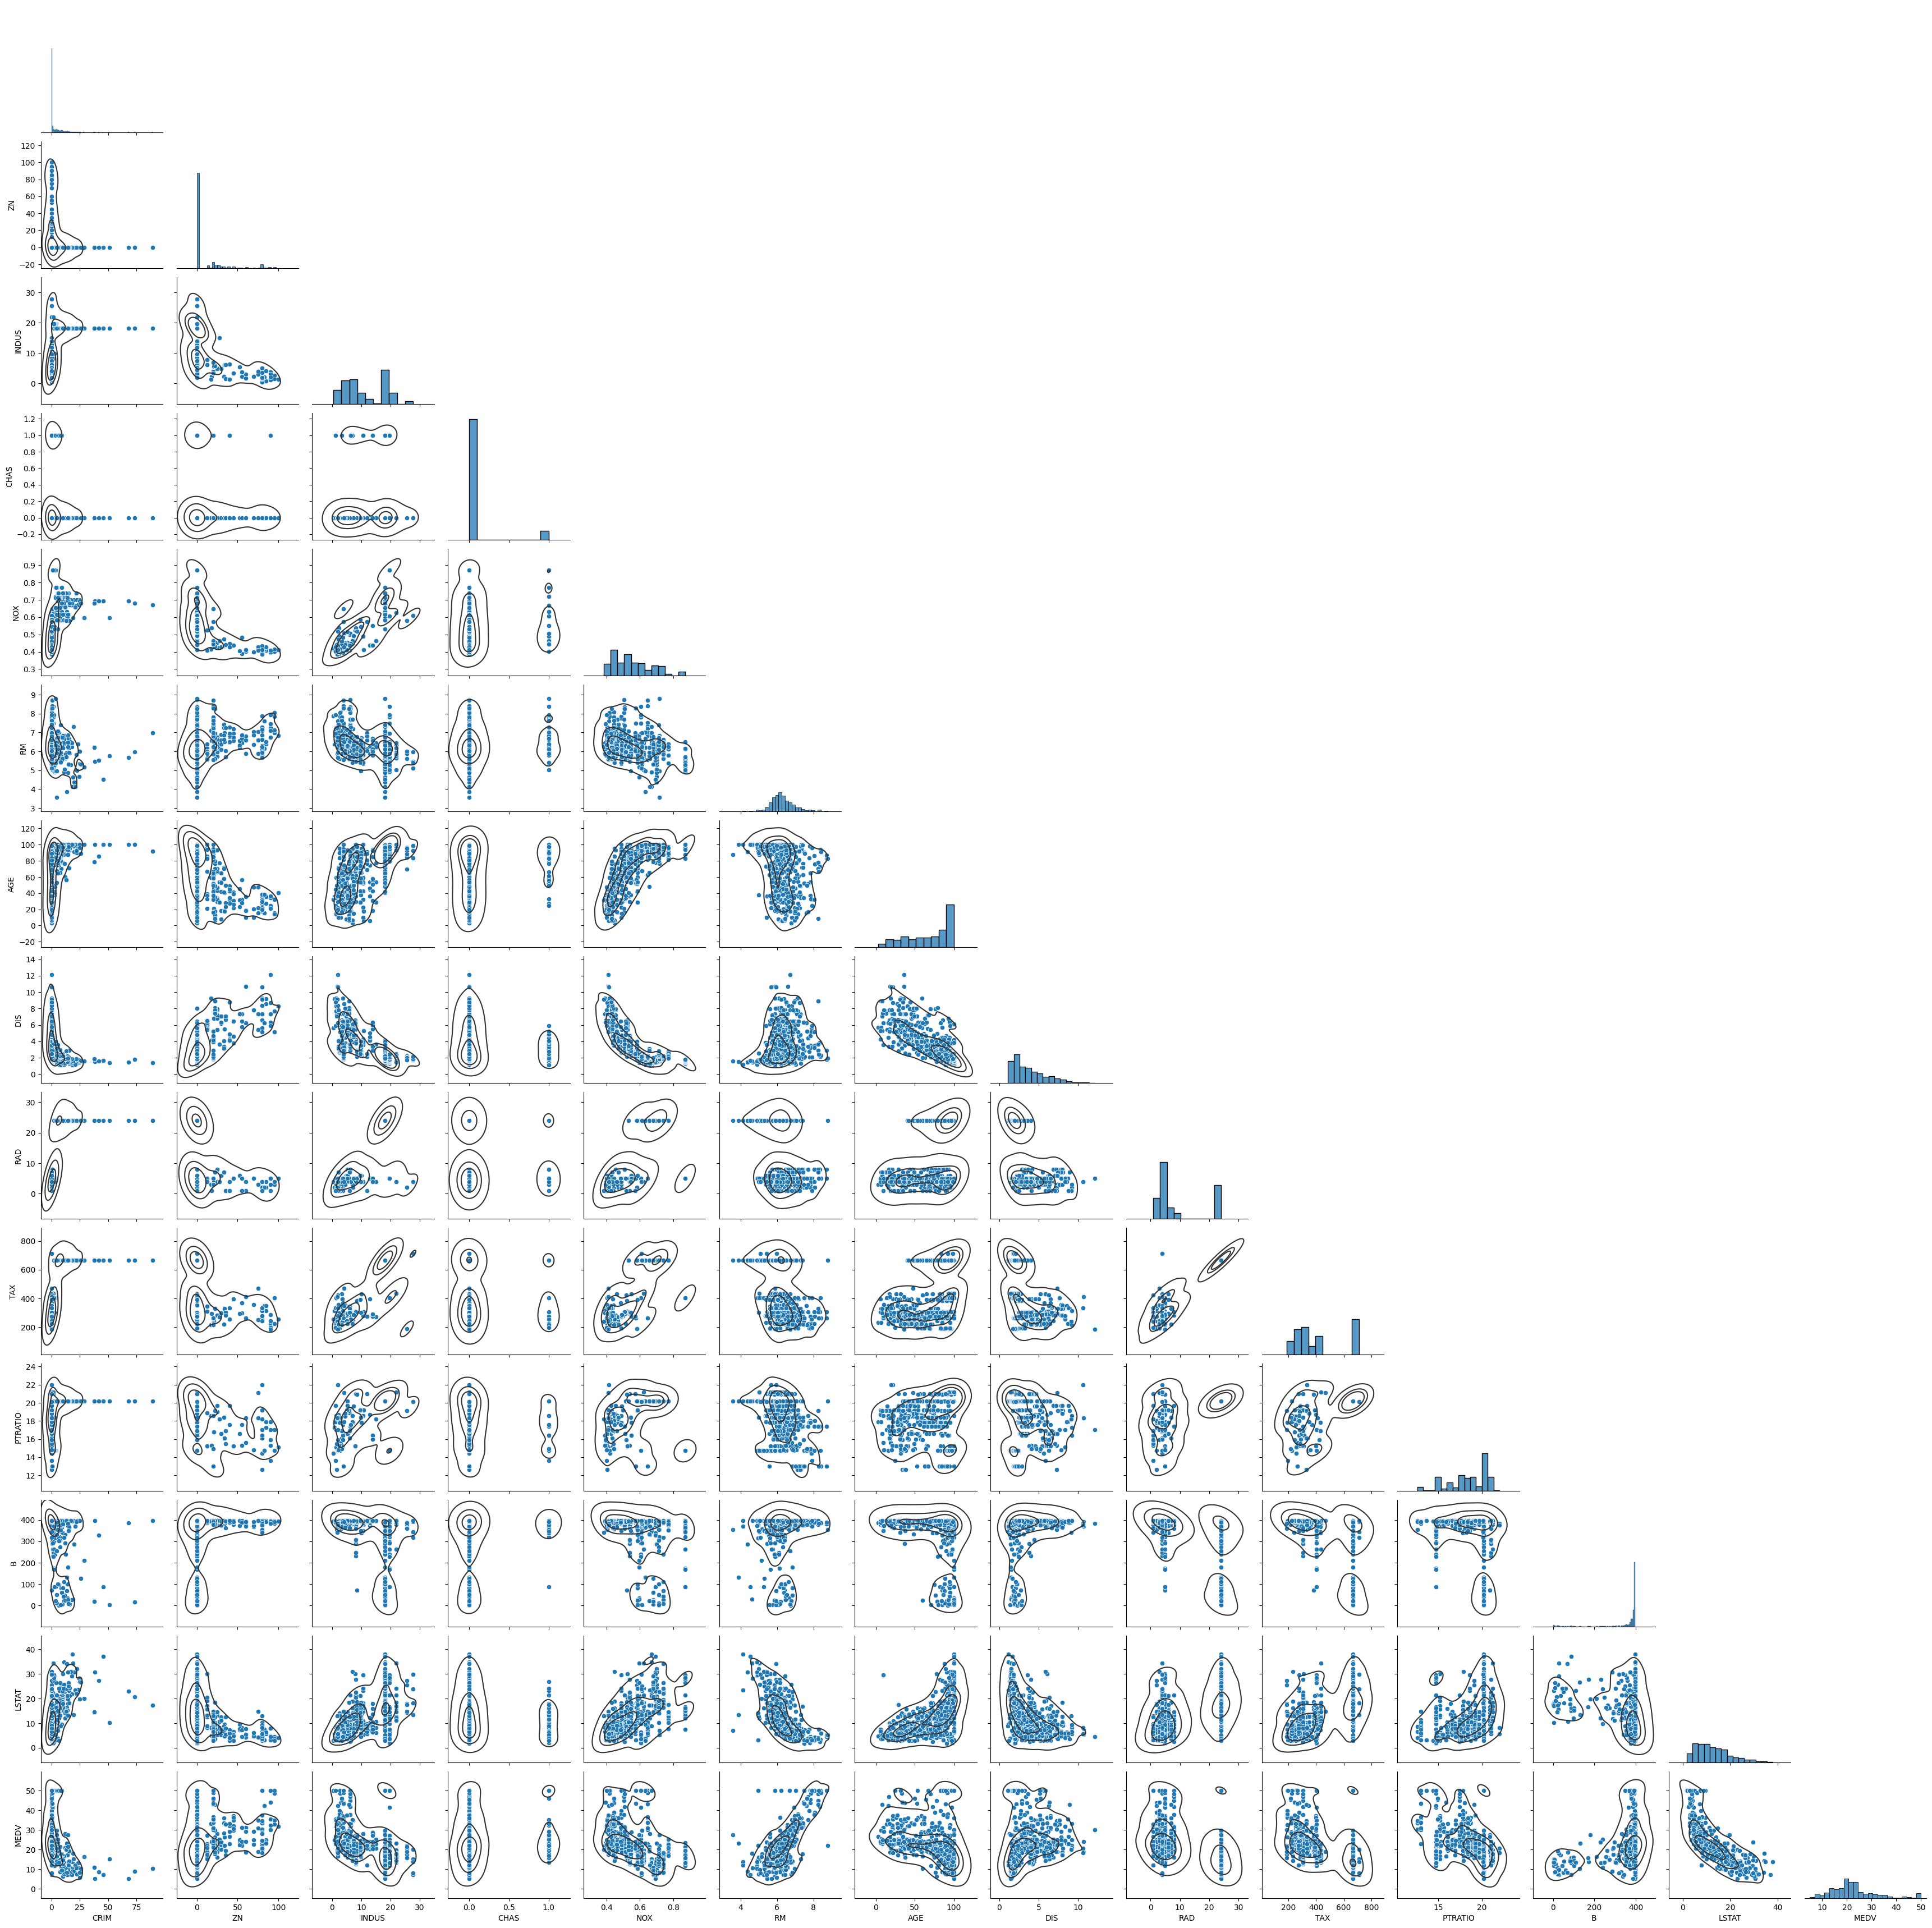

In [5]:
y = df['TAX']
g=sns.pairplot(df, corner=True)
g.map_lower(sns.kdeplot, levels=4, color=".2")

In [10]:
from sklearn.model_selection import train_test_split 
from sklearn.impute import SimpleImputer 
import matplotlib as plt
X = (
    df
    .dropna()
    .drop('MEDV', axis=1)
    .select_dtypes(include='float')
)
y = df.dropna()['MEDV'].copy()

In [36]:
from sklearn.metrics import mean_absolute_errors

ImportError: cannot import name 'mean_absolute_errors' from 'sklearn.metrics' (/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/__init__.py)

In [41]:

from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error

# extend data fram to easily assign new column
def ranklize(self, variable):
    self['rank'] = self[variable].rank()
    return(self)
pd.DataFrame.ranklize = ranklize
#y_fit['rank'] = y_fit['MEDV'].rank()
#y_fit.ranklize('fitted')

class CustomModel:
    def __init__(self, X, y, p=0.5):
        self.split(X, y, p)
        # self.fig = None
    def impute(self, method):
        return(self)
    def split(self, X, y, p=0.5):
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size = p, shuffle=True)
    def use_model(self, model):
        X_train = self.X_train
        y_train = self.y_train
        X_test = self.X_test
        y_test = self.y_test
        model.fit(X_train, y_train)
        y_fit = pd.DataFrame(model.predict(X_train), index=y_train.index, columns=['fitted'])
        y_fit = y_fit.join(y_train)
        y_pred =pd.DataFrame(model.predict(X_test), index=y_test.index, columns=['fitted'])
        y_pred = y_pred.join(y_test)
        mae = mean_absolute_error(y_pred.MEDV, y_pred.fitted)
        train_r_square = explained_variance_score(y_fit.MEDV, y_fit.fitted)
        test_r_square = explained_variance_score(y_pred.MEDV, y_pred.fitted)
        print('Mean absolute error is {x}'.format(x =mae))
        print('Training set R-square is {rs}'.format(rs=train_r_square.round(2)))
        print('Validation set R-square is {rs}'.format(rs=test_r_square.round(2)))
        self.model = model
        self.pred = y_pred
        self.fitted = y_fit
        self.mae = mae
    def plot(self):
        # if self.fig == None:
            fig, ((ax1, ax2), (ax3, ax4)) = subplots(2, 2)
            y_fit = self.fitted
            y_pred = self.pred
            sns.lineplot(data=y_fit.ranklize('MEDV').set_index('rank'), ax=ax1)
            sns.lineplot(data=y_pred.ranklize('MEDV').set_index('rank'), ax=ax3)
            sns.lineplot(data=y_fit.ranklize('fitted').set_index('rank'), ax=ax2)
            sns.lineplot(data=y_pred.ranklize('fitted').set_index('rank'), ax=ax4)
            ax1.set_title('Align fitted to acutal')
            ax3.set_title('Prediction')
            ax2.set_title('Use fitted to guess actual')
            ax4.set_title('Prediction')
            # self.fig = fig;
        # return(self.fig)


In [28]:

plt.style.use("seaborn-whitegrid")
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
)

/var/folders/r5/1cdq52mn21zdnqzl0fvp44zw0000gn/T/ipykernel_36810/1771872214.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


Mean absolute error is 2.5249840637450194
Training set R-square is 0.97
Validation set R-square is 0.78


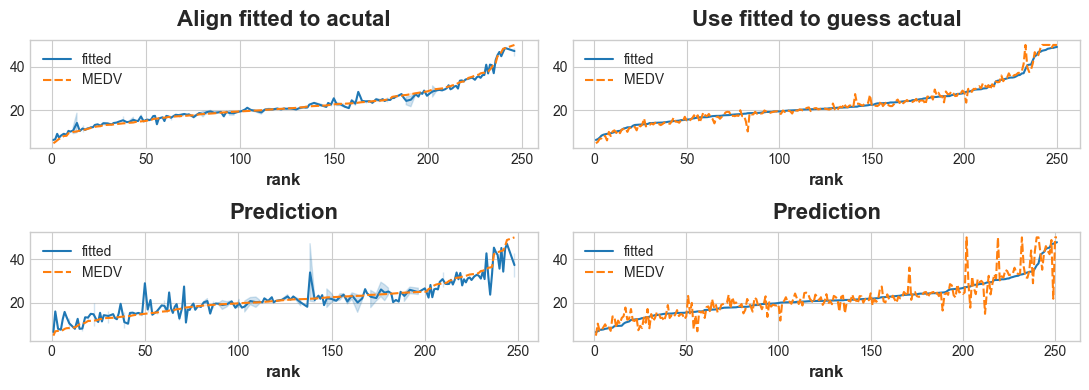

In [42]:
new_model = CustomModel(X, y)
new_model.use_model(RandomForestRegressor())
new_model.plot();

Mean absolute error is 3.3426294820717133
Training set R-square is 1.0
Validation set R-square is 0.71


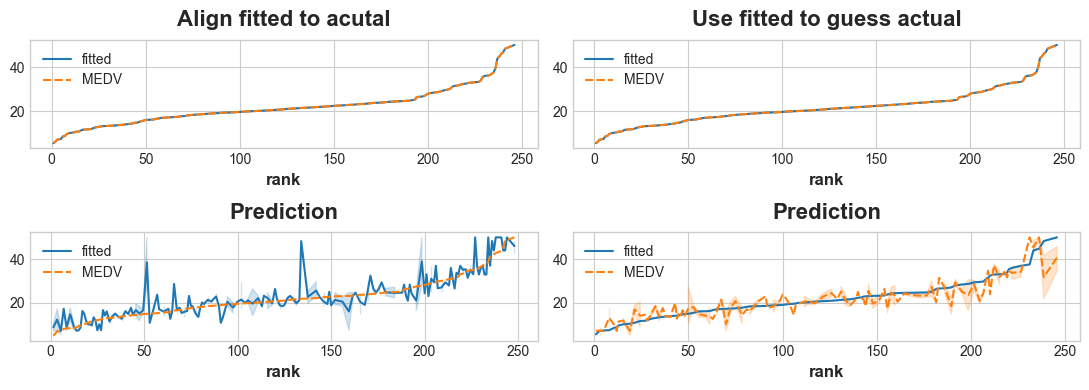

In [44]:

from sklearn.tree import DecisionTreeRegressor
DT_model = CustomModel(X, y)
DT_model.use_model(DecisionTreeRegressor())
DT_model.plot();

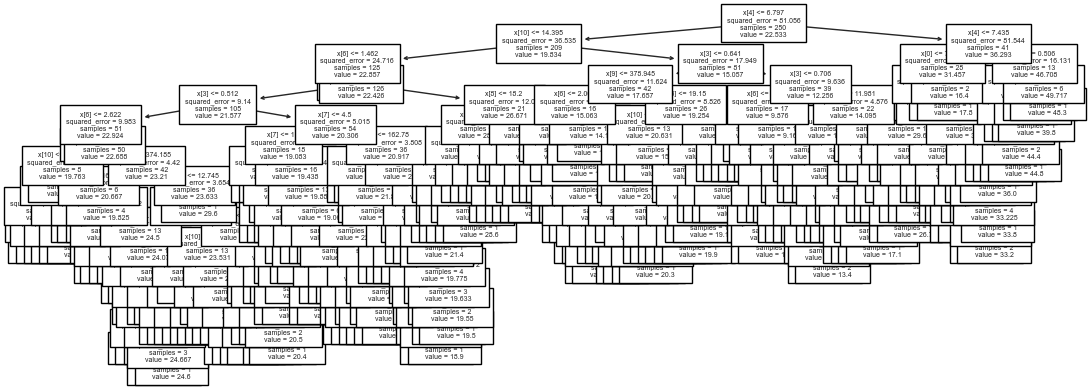

In [45]:
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
model_dot = export_graphviz(DT_model.model)
plot_tree(DT_model.model, fontsize=5);
#fig = plt.pyplot.gcf()
#fig.set_size_inches(25, 10)
#fig.savefig('reg_tree', dpi=500)

In [ ]:

from pyvis.network import Network
import igraph as ig
import networkx as nx
import os 
with open('reg_tree.dot', 'w') as f:
    f.write(model_dot)
g = nx.nx_pydot.read_dot('reg_tree.dot')
nt = Network(notebook=True,cdn_resources='in_line')
nt.from_nx(g)
# nt.generate_html('index.html')
# nt.show('index.html')
nt.show('nx.html')
# networkx dont work

In [56]:
import webbrowser
import os
webbrowser.open_new_tab('nx.html')

True

Clearly I have been overfitting this model interesting to see how others are doing it

Mean absolute error is 3.554521276595745
Training set R-square is 1.0
Validation set R-square is 0.6


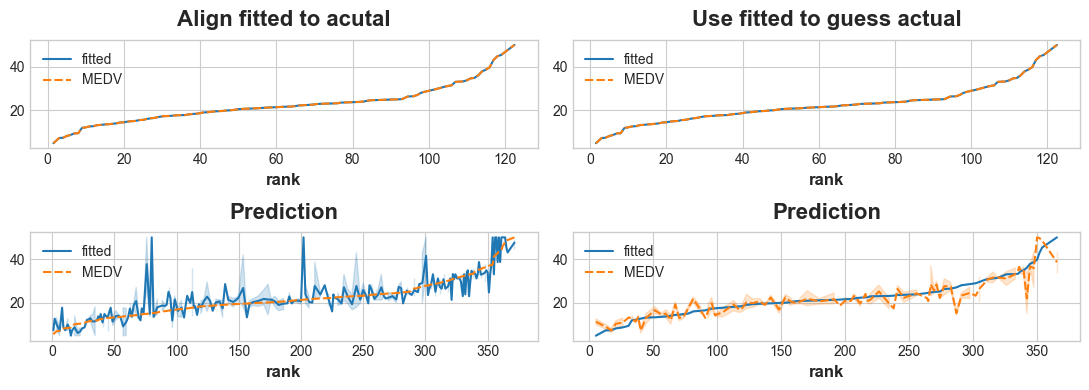

In [48]:
new_model = CustomModel(X, y, p = 0.75)
new_model.use_model(DecisionTreeRegressor())
new_model.plot()

In [49]:
new_model.X_train.shape

(125, 11)

In [57]:
#import gravis as gv
#gv.d3(g)

### Impute and Piplines 
Appearantly Python coders do something randomly different

In [307]:
df = pd.read_csv(
    'data/melb_data.csv'
    )
y = df.Price
X = df.drop('Price', axis=1)

In [214]:
def _color_red_or_green(val):
    color = 'red' if pd.isnull(val) else None
    return 'color: %s' % color
nan_cols = [*df.columns[df.isna().any()]]
df[nan_cols][df.isna().any(axis=1)]\
    .sample(5)\
    .style\
    .applymap(_color_red_or_green)

,Car,BuildingArea,YearBuilt,CouncilArea
11662,2.000000,nan,nan,Whittlesea
10501,2.000000,nan,1950.000000,Maribyrnong
6106,2.000000,nan,nan,Brimbank
12857,1.000000,nan,nan,nan
12418,2.000000,nan,nan,nan


In [308]:
# import packages
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# drop four column that is na
X = X.drop([col for col in X.columns if X[col].isna().any()], axis=1)
X.drop(['Date'], inplace=True, axis=1)
# find column bammes by types
num_cols = [col for col in X.columns if X[col].dtype in ['int64', 'float64']]
cat_cols = [col for col in X.columns if X[col].dtype in ['object']]

X = X[num_cols + cat_cols]
# define process for num_cols
numerical_transformer = SimpleImputer(strategy='constant') # f-->x
# define process for cat_cols
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
]) # this is like saying impute, then do a hot encode f--> f--> x

# bundle up functions
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ])
model = RandomForestRegressor(n_estimators=50, random_state=0)

In [309]:
my_pipeline = Pipeline(
    steps = [
        ('preprocessor',preprocessor),
        ('model', model)]
)

In [310]:
X_t, X_v, y_t, y_v = train_test_split(X, y, train_size=0.4)

In [311]:
my_pipeline.fit(X_t, y_t)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='constant'),
                                                  ['Rooms', 'Distance',
                                                   'Postcode', 'Bedroom2',
                                                   'Bathroom', 'Landsize',
                                                   'Lattitude', 'Longtitude',
                                                   'Propertycount']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Suburb', 'Address', 'Type',
                                                   'Method', 'SellerG',
                                                   'Regionname'])])),
                ('model',
                 RandomForestRegressor(n_estimators=50, random_state=0))])

In [312]:
y_p = my_pipeline.predict(X_v)
y_f = my_pipeline.predict(X_t)
mean_absolute_error(y_p, y_v)

177337.0596072656

In [313]:
mean_absolute_error(y_t, y_f)

66466.58114138439

In [314]:
from skimpy import skim
skim(df[['Price']])

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 13580  │ │ float64     │ 1     │                                                          │
│ │ Number of columns │ 1      │ └─────────────┴───────┘                                                          │
│ └───────────────────┴────────┘                                                                                  │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name    ┃ NA  ┃ NA %   ┃ mean      ┃ sd       ┃ p0      ┃ p25      ┃ p75       ┃ p100      ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━┩  │
│ │ Price          │   0 │      0 │   1100000 │   640000 │   85000 │   650000 │   1300000 │   9000000 │   █▁   │  │
│ └────────────────┴─────┴────────┴───────────┴──────────┴─────────┴──────────┴───────────┴───────────┴────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [315]:
my_pipeline.named_steps.get('model')

RandomForestRegressor(n_estimators=50, random_state=0)

In [316]:
from sklearn.model_selection import cross_val_score
score = -1 * cross_val_score(
    my_pipeline, X, y, cv=5,
    scoring = 'neg_mean_absolute_error' # don't forget this argument
)

In [318]:
score.mean()

180187.86747815413

In [326]:
np.arange(1,9) * 50

array([ 50, 100, 150, 200, 250, 300, 350, 400])